In [ ]:
import nltk


In [1]:
from nltk.corpus import reuters
from nltk.probability import FreqDist

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# 모든 단어에 대한 빈도수를 계산한다

In [3]:
fd = FreqDist(reuters.words())

### 상위의 26개를 가지고 와서 보여준다. 

In [4]:
fd.most_common(26)

[('.', 94687),
 (',', 72360),
 ('the', 58251),
 ('of', 35979),
 ('to', 34035),
 ('in', 26478),
 ('said', 25224),
 ('and', 25043),
 ('a', 23492),
 ('mln', 18037),
 ('vs', 14120),
 ('-', 13705),
 ('for', 12785),
 ('dlrs', 11730),
 ("'", 11272),
 ('The', 10968),
 ('000', 10277),
 ('1', 9977),
 ('s', 9298),
 ('pct', 9093),
 ('it', 8842),
 (';', 8762),
 ('&', 8698),
 ('lt', 8694),
 ('on', 8556),
 ('from', 7986)]

### 상위 26개에 대한 plot 그래프를 그린다,

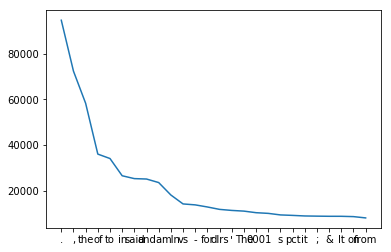

In [8]:
plt.plot(range(26), [ y for x,y in fd.most_common(26)])
plt.xticks(range(26), [ x for x,y in fd.most_common(26)])
plt.show()

In [7]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the *x*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = xticks()
    
      # set the locations of the xticks
      xticks( arange(6) )
    
      # set the locations and labels of the xticks
      xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      xticks( arange(12), calendar.month_name[1:13], rotation=17 )



## log.log  그래프를 통해서 상위 26개에 대한 그래프를 그린다.


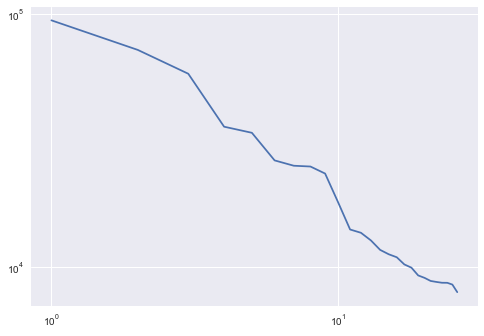

In [17]:
import seaborn
plt.loglog(range(1,27), [ y for x,y in fd.most_common(26)],basex=10)
#plt.xticks(range(26), [ x for x,y in fd.most_common(26)])
plt.show()

## 빈도에 대한 그래프를 그린다.

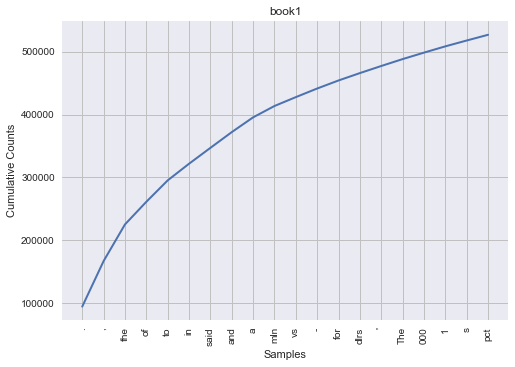

In [19]:
fd.plot(20,title = "book1", cumulative=True)

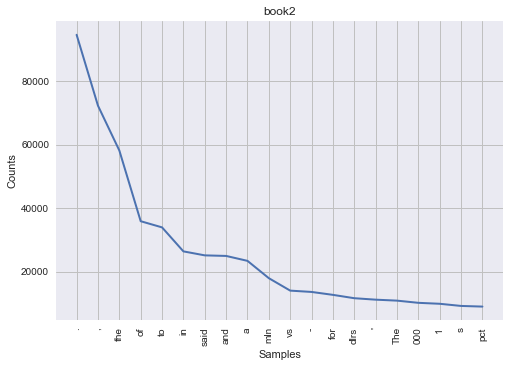

In [18]:
fd.plot(20,title = "book2")

# 두 비교되는 단어들이 유사도를 점검하기 

In [23]:
import nltk

In [33]:
help(nltk.accuracy)

Help on function accuracy in module nltk.metrics.scores:

accuracy(reference, test)
    Given a list of reference values and a corresponding list of test
    values, return the fraction of corresponding values that are
    equal.  In particular, return the fraction of indices
    ``0<i<=len(test)`` such that ``test[i] == reference[i]``.
    
    :type reference: list
    :param reference: An ordered list of reference values.
    :type test: list
    :param test: A list of values to compare against the corresponding
        reference values.
    :raise ValueError: If ``reference`` and ``length`` do not have the
        same length.



In [29]:
from nltk.corpus import reuters, brown

trains = reuters.words()

test = brown.words()

## 두 단어의 세트의 길이는 동일해야 한다

In [32]:
print(nltk.accuracy(trains[:len(test)],test))

0.008579976438005085


## 두 단어 세트의 일치도를 확인해 본다

In [35]:
help(nltk.precision)

Help on function precision in module nltk.metrics.scores:

precision(reference, test)
    Given a set of reference values and a set of test values, return
    the fraction of test values that appear in the reference set.
    In particular, return card(``reference`` intersection ``test``)/card(``test``).
    If ``test`` is empty, then return None.
    
    :type reference: set
    :param reference: A set of reference values.
    :type test: set
    :param test: A set of values to compare against the reference set.
    :rtype: float or None



In [34]:
trainset = set(trains)
testset  = set(test)

nltk.precision(trainset, testset)

0.2776638064826873

## 테스트 세트에 나타나는 참조 값의 비율

In [36]:
help(nltk.recall)

Help on function recall in module nltk.metrics.scores:

recall(reference, test)
    Given a set of reference values and a set of test values, return
    the fraction of reference values that appear in the test set.
    In particular, return card(``reference`` intersection ``test``)/card(``reference``).
    If ``reference`` is empty, then return None.
    
    :type reference: set
    :param reference: A set of reference values.
    :type test: set
    :param test: A set of values to compare against the reference set.
    :rtype: float or None



In [37]:
nltk.recall(trainset, testset)

0.3741586538461538

## f-measure는  precision과 recall의 평균입니다.

In [38]:
help(nltk.f_measure)

Help on function f_measure in module nltk.metrics.scores:

f_measure(reference, test, alpha=0.5)
    Given a set of reference values and a set of test values, return
    the f-measure of the test values, when compared against the
    reference values.  The f-measure is the harmonic mean of the
    ``precision`` and ``recall``, weighted by ``alpha``.  In particular,
    given the precision *p* and recall *r* defined by:
    
    - *p* = card(``reference`` intersection ``test``)/card(``test``)
    - *r* = card(``reference`` intersection ``test``)/card(``reference``)
    
    The f-measure is:
    
    - *1/(alpha/p + (1-alpha)/r)*
    
    If either ``reference`` or ``test`` is empty, then ``f_measure``
    returns None.
    
    :type reference: set
    :param reference: A set of reference values.
    :type test: set
    :param test: A set of values to compare against the reference set.
    :rtype: float or None



In [39]:
nltk.f_measure(trainset, testset)

0.3187687518559858